# ARIMA(모듈)

## #01. 작업준비

### [1] 패키지 가져오기

In [1]:
import os
import sys
work_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(work_path)

from helper.timeserise import *
from helper.plot import *
from helper.util import *

### [2] 데이터 가져오기

In [2]:
origin = my_read_excel("https://data.hossam.kr/tsdata/air_passengers.xlsx", index_col="Month", timeindex=True, info=False)

## #02. 데이터 전처리

### [1] 훈련, 검증 데이터 분리

In [3]:
train, test = my_timeseries_split(origin)

my_pretty_table(train.head())
my_pretty_table(test.head())

+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1949-01-01 00:00:00 |          112 |
| 1949-02-01 00:00:00 |          118 |
| 1949-03-01 00:00:00 |          132 |
| 1949-04-01 00:00:00 |          129 |
| 1949-05-01 00:00:00 |          121 |
+---------------------+--------------+
+---------------------+--------------+
| Month               |   Passengers |
|---------------------+--------------|
| 1958-08-01 00:00:00 |          505 |
| 1958-09-01 00:00:00 |          404 |
| 1958-10-01 00:00:00 |          359 |
| 1958-11-01 00:00:00 |          310 |
| 1958-12-01 00:00:00 |          337 |
+---------------------+--------------+


## #03. ACF, PACF 그래프

### [1] ACF

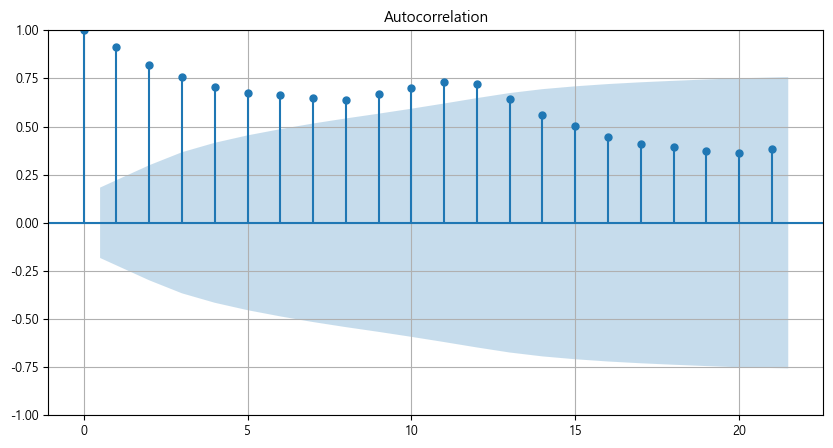

In [4]:
my_acf_plot(train)

### [2] PACF

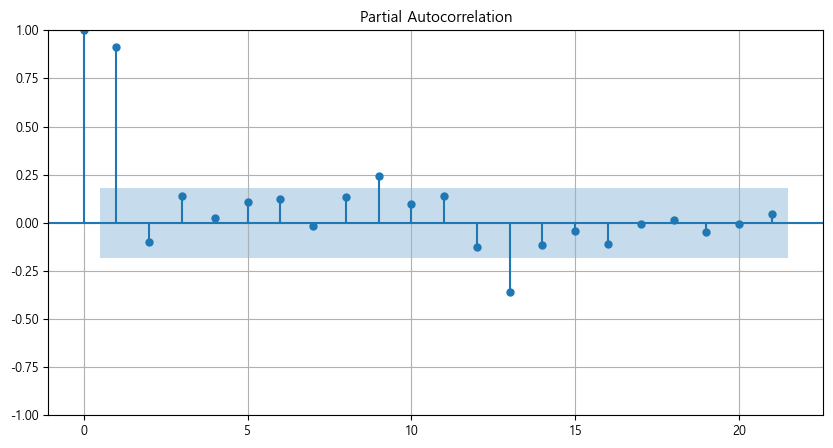

In [5]:
my_pacf_plot(train)

### [3] ACF + PACF

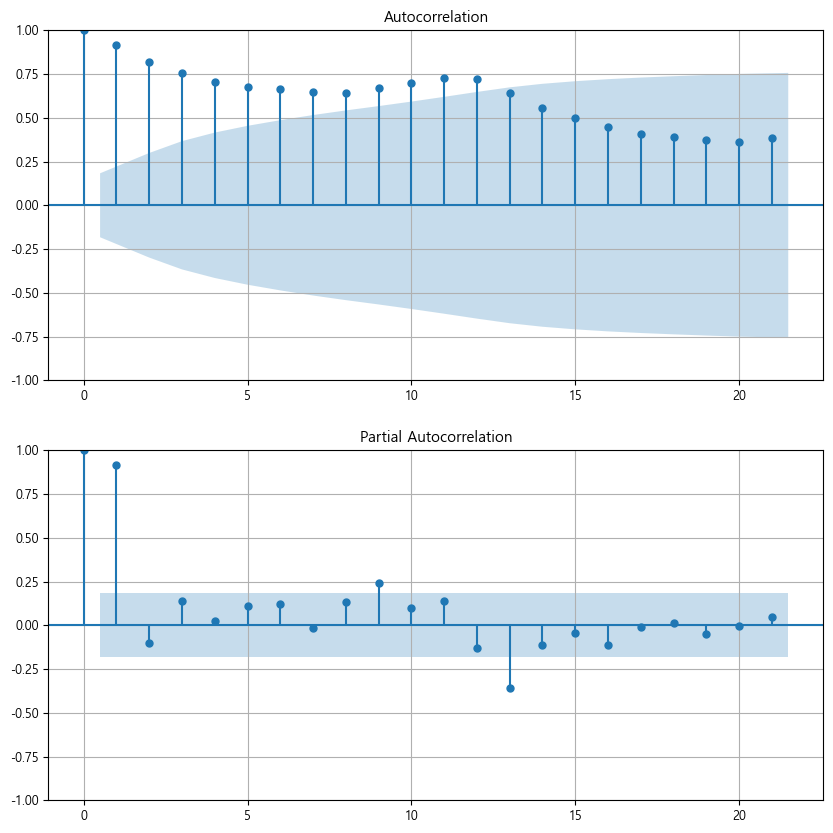

In [6]:
my_acf_pacf_plot(train)

## #04. 시계열 분석

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=757.826, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=755.750, Time=0.07 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=756.380, Time=0.09 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=755.499, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=755.982, Time=0.09 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=757.649, Time=0.13 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=756.771, Time=0.05 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=756.022, Time=0.05 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=756.011, Time=0.02 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=757.976, Time=0.08 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=757.438, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 0.704 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observ

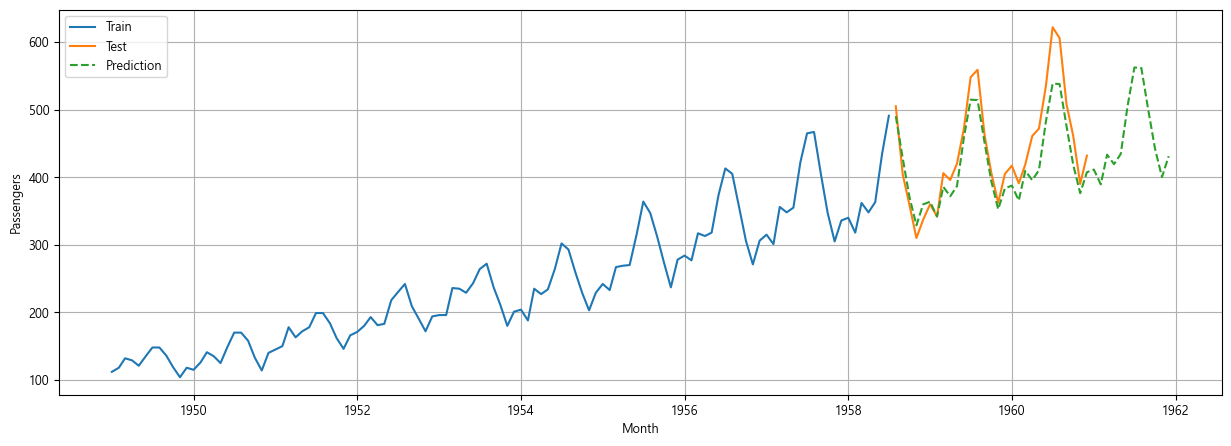

In [7]:
model = my_arima(train, test, p=2, d=1, q=2, s=12, periods=12, auto=True)